In [109]:
import massmapper as mm
import numpy as np
import random
import merg_rates
import my_sham_hack as sham

from scipy import integrate,interpolate
from wetzel_utils.utility.utility_catalog import indices_tree

In [2]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams['font.family']='serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
#rcParams['xtick.major.size'] = 5 
#rcParams['xtick.major.width'] = 1.5 
rcParams['ytick.labelsize'] = 19
#rcParams['ytick.major.size'] = 5 
#rcParams['ytick.major.width'] = 1.5 
rcParams['legend.frameon'] = True
rcParams['axes.grid']=True
rcParams['axes.titlesize']=26
rcParams['axes.labelsize']=23
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=20

# Making sure SMFs are not degraded by scatter

In [181]:
source='li-march'
seed=None

#shamzibeg=0
#shamziend=32

shamzibeg=0
shamziend=33

#tpm0=merg_rates.shamedTreepmClass(0.,source=source,seed=seed,
#                                  shamzibeg=shamzibeg,
#                                  shamziend=shamziend)
#tpm1=merg_rates.shamedTreepmClass(0.1,source=source,seed=seed,
#                                  shamzibeg=shamzibeg,
#                                  shamziend=shamziend)
tpm2=merg_rates.shamedTreepmClass(0.2,source=source,seed=seed,
                                  shamzibeg=shamzibeg,
                                  shamziend=shamziend,
                                  mmin=3.)
tpm3=merg_rates.shamedTreepmClass(0.3,source=source,seed=seed,
                                  shamzibeg=shamzibeg,
                                  shamziend=shamziend,
                                  mmin=3.5)
tpm4=merg_rates.shamedTreepmClass(0.4,source=source,seed=seed,
                                  shamzibeg=shamzibeg,
                                  shamziend=shamziend,
                                  mmin=4.)
#tpm5=merg_rates.shamedTreepmClass(0.5,seed=1)

# in merg_rates.shamedTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_

5062757


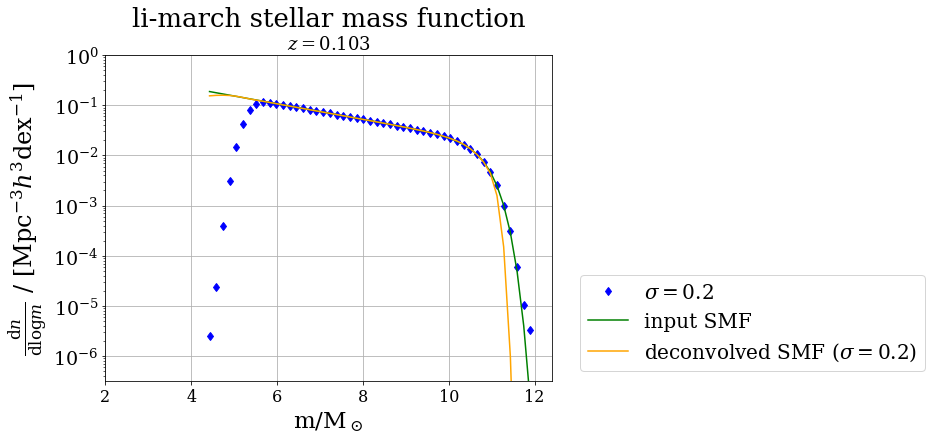

5056761


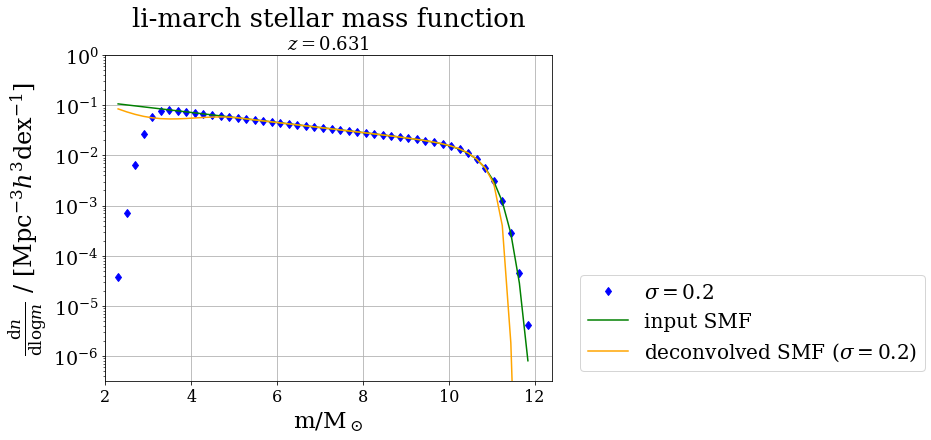

2251889


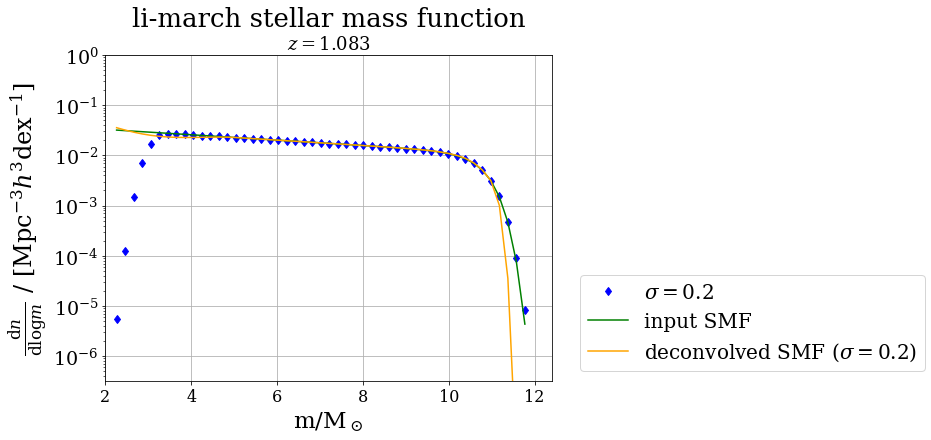

3198610


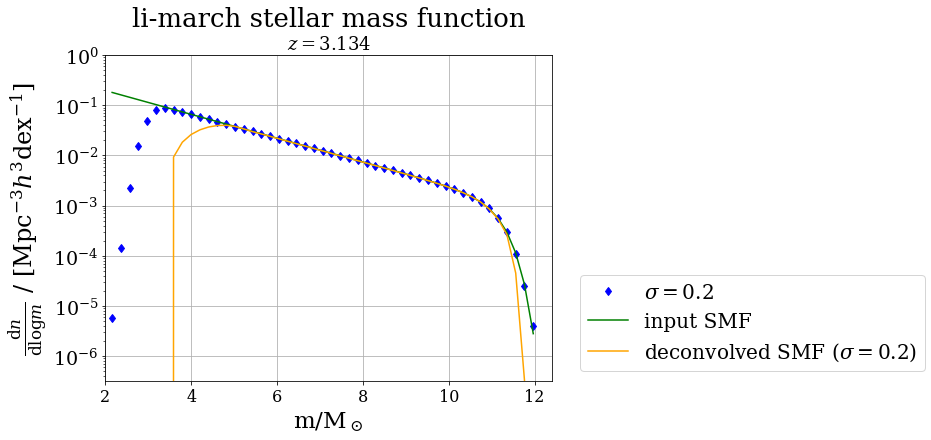

2678992


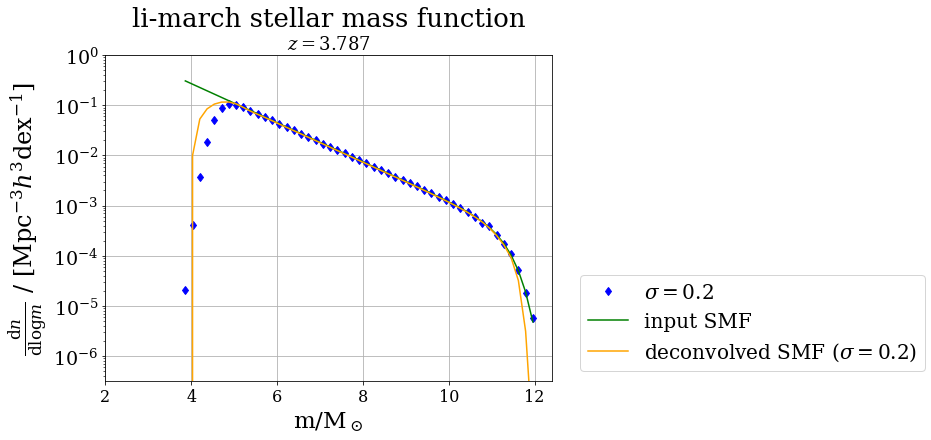

In [32]:
for s in [2,10,15,29,32]:
#for s in [0,1]:
    z=tpm2.subcat.snap[s][1]
    smf=sham.SMFClass(tpm2.source,z,0.2,mmin=5.)
    #smf=sham.SMFClass('fontana',z)

    #midbins0,n0=tpm0.dndm(s,paramed=True)
    #midbins1,n1=tpm1.dndm(s,paramed=True)
    midbins2,n2=tpm2.dndm(s,paramed=True)
    #midbins3,n3=tpm3.dndm(s,paramed=True)
    #midbins4,n4=tpm4.dndm(s,paramed=True)
    smf_in=smf.dndm(midbins2)/smf.hubble**3.
    smf_deconv=smf.dndm_scat(midbins2)/smf.hubble**3.

    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(1,1,1)

    #ax.semilogy(midbins0,n0,'cd',
    #            label='$\sigma=0.0$')
    #ax.semilogy(midbins1,n1,'kd',
    #            label='$\sigma=0.1$')
    ax.semilogy(midbins2,n2,'bd',
                label='$\sigma=0.2$')
    #ax.semilogy(midbins3,n3,'md',
    #            label='$\sigma=0.3$')
    #ax.semilogy(midbins4,n4,'rd',
    #            label='$\sigma=0.4$')
    ax.semilogy(midbins2,smf_in,'g-',
                label='input SMF')
    ax.semilogy(midbins2,smf_deconv,'-',
                color='orange',
                label='deconvolved SMF ($\sigma=0.2$)')
    ax.set_title('{0} stellar mass function'.format(tpm2.source),y=1.07)
    ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
                  '[Mpc$^{-3}h^3$dex$^{-1}$]',
                  fontsize=24)
    ax.text(0.5,1.02,'$z=${0:0.3f}'.format(z),
            transform=ax.transAxes,ha='center',fontsize=18)
    ax.set_xlabel('m/M$_\odot$')
    ax.tick_params(axis='both')
    ax.set_xlim(2,12.4)
    ax.set_ylim(1.*10.**(-6.5),1)
    ax.legend(bbox_to_anchor=(1.04,0), loc="lower left")

    plt.show()

In [ ]:
for s in [2,10,15,29,32]:
#for s in [0,1]:
    z=tpm2.subcat.snap[s][1]
    smf=sham.SMFClass(tpm2.source,z,0.2,mmin=7.3)
    #smf=sham.SMFClass('fontana',z)

    midbins0,n0=tpm0.dndm(s,paramed=True)
    midbins1,n1=tpm1.dndm(s,paramed=True)
    midbins2,n2=tpm2.dndm(s,paramed=True)
    midbins3,n3=tpm3.dndm(s,paramed=True)
    midbins4,n4=tpm4.dndm(s,paramed=True)
    smf_in=smf.dndm(midbins2)/smf.hubble**3.
    smf_deconv=smf.dndm_scat(midbins2)/smf.hubble**3.

    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(1,1,1)

    ax.semilogy(midbins0,n0,'cd',
                label='$\sigma=0.0$')
    ax.semilogy(midbins1,n1,'kd',
                label='$\sigma=0.1$')
    ax.semilogy(midbins2,n2,'bd',
                label='$\sigma=0.2$')
    ax.semilogy(midbins3,n3,'md',
                label='$\sigma=0.3$')
    ax.semilogy(midbins4,n4,'rd',
                label='$\sigma=0.4$')
    ax.semilogy(midbins2,smf_in,'g-',
                label='input SMF')
    ax.semilogy(midbins2,smf_deconv,'-',
                color='orange',
                label='deconvolved SMF ($\sigma=0.2$)')
    ax.set_title('{0} stellar mass function'.format(tpm2.source),y=1.07)
    ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
                  '[Mpc$^{-3}h^3$dex$^{-1}$]',
                  fontsize=24)
    ax.text(0.5,1.02,'$z=${0:0.3f}'.format(z),
            transform=ax.transAxes,ha='center',fontsize=18)
    ax.set_xlabel('m/M$_\odot$')
    ax.tick_params(axis='both')
    ax.set_xlim(4,12.4)
    ax.set_ylim(1.*10.**(-6.5),1)
    ax.legend(bbox_to_anchor=(1.04,0), loc="lower left")

    plt.show()

# Presentation Plot

5062757
5062757
5062757
2251889
2031008
1823296
2678992
2678992
2678992


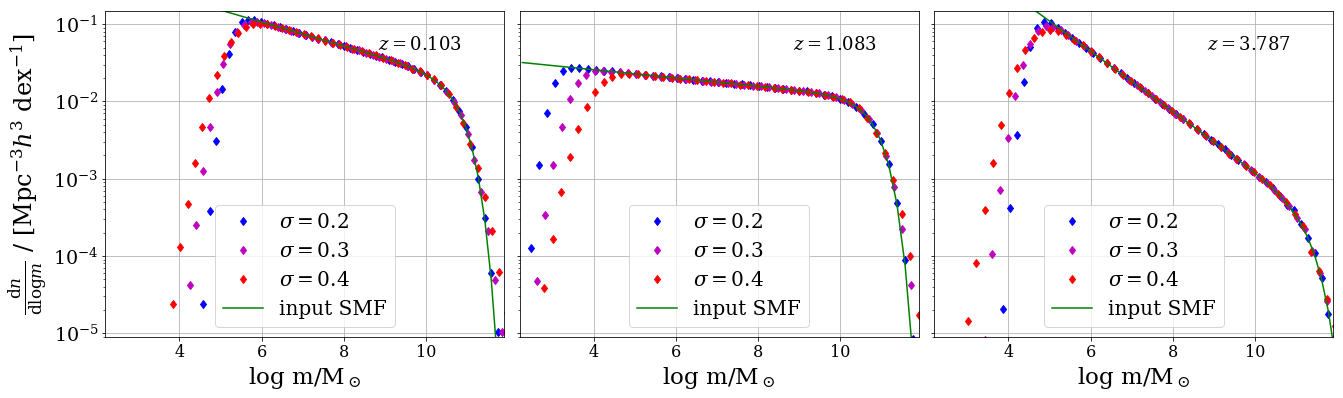

In [12]:
fig=plt.figure(figsize=(22,6))

for i,s in enumerate([2,15,32]):
    z=tpm2.subcat.snap[s][1]
    smf=sham.SMFClass(tpm2.source,z)
    #smf=sham.SMFClass('fontana',z)

    midbins2,n2=tpm2.dndm(s,paramed=True)
    midbins3,n3=tpm3.dndm(s,paramed=True)
    midbins4,n4=tpm4.dndm(s,paramed=True)
    smf_in=smf.dndm(midbins2)/smf.hubble**3.


    ax=fig.add_subplot(1,3,i+1)

    ax.semilogy(midbins2,n2,'bd',
                label='$\sigma=0.2$')
    ax.semilogy(midbins3,n3,'md',
                label='$\sigma=0.3$')
    ax.semilogy(midbins4,n4,'rd',
                label='$\sigma=0.4$')
    ax.semilogy(midbins2,smf_in,'g-',
                label='input SMF')
    #ax.set_title('{0} stellar mass function'.format(tpm2.source),y=1.05)

    ax.text(0.79,0.88,'$z=${0:0.3f}'.format(z),
            transform=ax.transAxes,ha='center',fontsize=18)
    ax.set_xlabel('log m/M$_\odot$')
    ax.tick_params(axis='both')
    ax.set_xlim(2.2,11.9)
    ax.set_ylim(9e-6,1.5e-1)
    ax.legend()
    
    if i==0:
        ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}h^3$ dex$^{-1}$]',
              fontsize=24)
    if i in [1,2]:
        plt.setp(ax.get_yticklabels(), visible=False)

fig.subplots_adjust(wspace=0.04)

plt.show()

## Plot for Issues Section of Thesis

In [182]:
reload(merg_rates)
reload(sham)
tpm_const2=merg_rates.shamedTreepmClass(0.2,source=source,seed=seed,
                                       shamzibeg=shamzibeg,
                                       shamziend=shamziend,
                                       mmin=3.,conscat=True)
#tpm_const3=merg_rates.shamedTreepmClass(0.3,source=source,seed=seed,
#                                       shamzibeg=shamzibeg,
#                                       shamziend=shamziend,
#                                       mmin=3.5,conscat=True)
#tpm_const4=merg_rates.shamedTreepmClass(0.4,source=source,seed=seed,
#                                       shamzibeg=shamzibeg,
#                                       shamziend=shamziend,
#                                       mmin=4.,conscat=True)

# in merg_rates.shamedTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_

In [131]:
print tpm_const2.subcat[1]['m.max.test'][:10]
chiis=indices_tree(tpm_const2.subcat,1,0,xrange(10))
print chiis
print tpm_const2.subcat[0]['m.max'][chiis]
paris=indices_tree(tpm_const2.subcat,1,2,xrange(10))
print paris
print tpm_const2.subcat[0]['m.max.test'][chiis]
print tpm_const2.subcat[1]['m.max'][:10]

[        nan 12.7738266  10.76711559         nan 10.77294445 10.59029007
 10.42292786 12.4252882          nan 11.09031105]
[    0     2     3  3300     4     5     8 10860    10    12]
[ 0.       12.773827 10.767116 11.423252 10.772944 10.59029  10.422928
 12.425288 11.008473 11.090311]
[       0      327        1 -5485482        3        4      981        6
 -5485482        7]
[        nan 12.7738266  10.76711559 11.42325211 10.77294445 10.59029007
 10.42292786 12.4252882  11.0084734  11.09031105]
[ 0.       12.773827 10.749142  0.       10.772944 10.581381 10.416397
 12.425288  0.       11.090311]


In [132]:
print tpm_const2.subcat[1]['scat'][:10]
paris=indices_tree(tpm_const2.subcat,1,0,xrange(10))
print tpm_const2.subcat[0]['scat'][paris]

[        nan  0.22440298 -0.11271942         nan  0.03978948  0.01493633
 -0.10697022  0.12313619         nan  0.33736321]
[        nan  0.22440298 -0.11271942  0.11750647  0.03978948  0.01493633
 -0.10697022  0.12313619 -0.02123957  0.33736321]


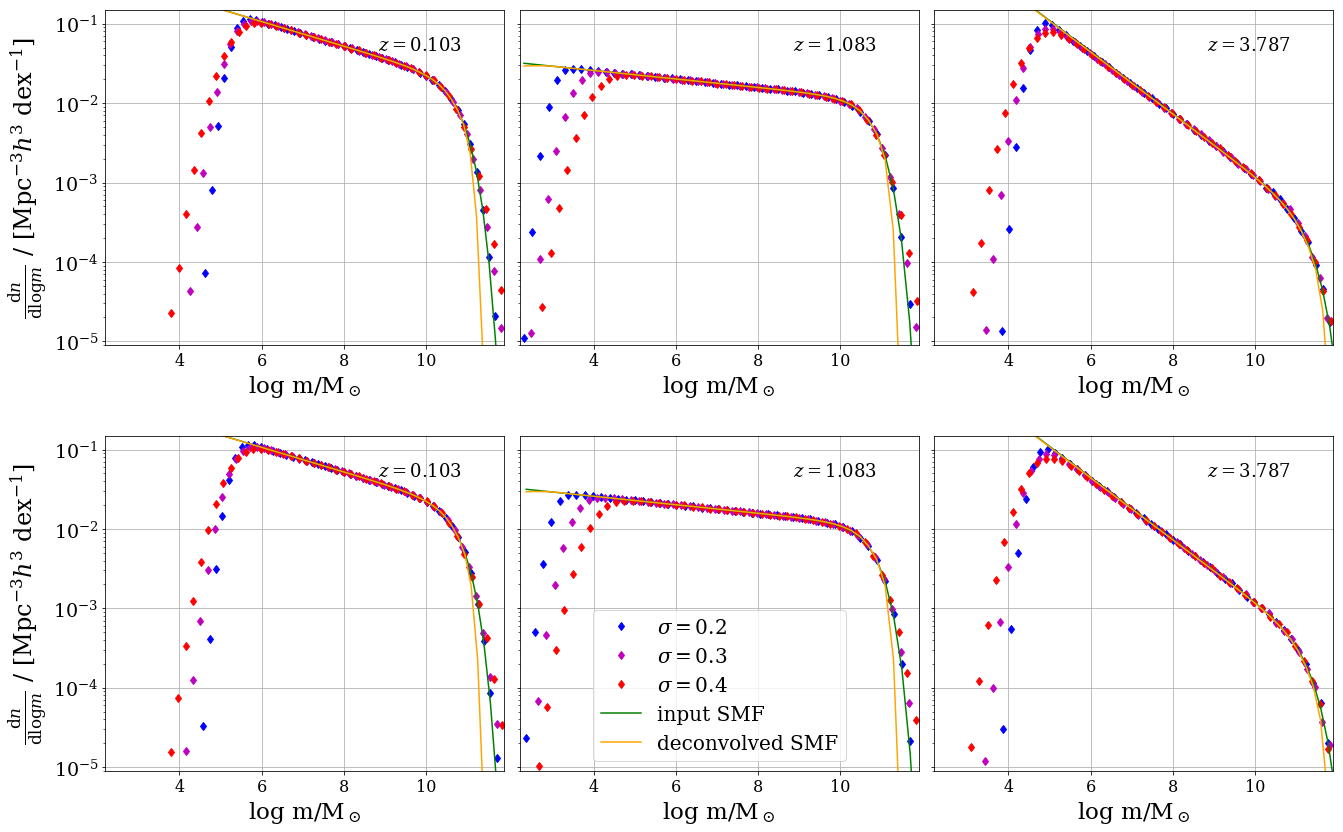

In [183]:
fig=plt.figure(figsize=(22,14))

#Non-constant scatter (top half of panel):
for i,s in enumerate([2,15,32]):
    z=tpm2.subcat.snap[s][1]
    smf=sham.SMFClass(tpm2.source,z,0.2,mmin=3.)

    midbins2,n2=tpm2.dndm(s,paramed=True)
    midbins3,n3=tpm3.dndm(s,paramed=True)
    midbins4,n4=tpm4.dndm(s,paramed=True)
    smf_in=smf.dndm(midbins2)/smf.hubble**3.
    smf_dec=smf.dndm_scat(midbins2)/smf.hubble**3.

    ax=fig.add_subplot(2,3,i+1)

    ax.semilogy(midbins2,n2,'bd',
                label='$\sigma=0.2$')
    ax.semilogy(midbins3,n3,'md',
                label='$\sigma=0.3$')
    ax.semilogy(midbins4,n4,'rd',
                label='$\sigma=0.4$')
    ax.semilogy(midbins2,smf_in,'g-',
                label='input SMF')
    ax.semilogy(midbins2,smf_dec,'-',
                color='orange',
                label='deconvolved SMF')

    ax.text(0.79,0.88,'$z=${0:0.3f}'.format(z),
            transform=ax.transAxes,ha='center',fontsize=18)
    ax.set_xlabel('log m/M$_\odot$')
    ax.tick_params(axis='both')
    ax.set_xlim(2.2,11.9)
    ax.set_ylim(9e-6,1.5e-1)
    #ax.legend()
    
    if i==0:
        ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}h^3$ dex$^{-1}$]',
              fontsize=24)
    if i in [1,2]:
        plt.setp(ax.get_yticklabels(), visible=False)

#Constant scatter (bottom half of panel):
for i,s in enumerate([2,15,32]):
    z=tpm2.subcat.snap[s][1]
    smf=sham.SMFClass(tpm2.source,z,0.2,mmin=3.)

    midbins2,n2=tpm_const2.dndm(s,paramed=True)
    midbins3,n3=tpm_const3.dndm(s,paramed=True)
    midbins4,n4=tpm_const4.dndm(s,paramed=True)
    smf_in=smf.dndm(midbins2)/smf.hubble**3.
    smf_dec=smf.dndm_scat(midbins2)/smf.hubble**3.

    ax=fig.add_subplot(2,3,i+4)

    ax.semilogy(midbins2,n2,'bd',
                label='$\sigma=0.2$')
    ax.semilogy(midbins3,n3,'md',
                label='$\sigma=0.3$')
    ax.semilogy(midbins4,n4,'rd',
                label='$\sigma=0.4$')
    ax.semilogy(midbins2,smf_in,'g-',
                label='input SMF')
    ax.semilogy(midbins2,smf_dec,'-',
            color='orange',
            label='deconvolved SMF')

    ax.text(0.79,0.88,'$z=${0:0.3f}'.format(z),
            transform=ax.transAxes,ha='center',fontsize=18)
    ax.set_xlabel('log m/M$_\odot$')
    ax.tick_params(axis='both')
    ax.set_xlim(2.2,11.9)
    ax.set_ylim(9e-6,1.5e-1)
    
    if i==0:
        ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}h^3$ dex$^{-1}$]',
              fontsize=24)
    if i in [1,2]:
        plt.setp(ax.get_yticklabels(), visible=False)

fig.subplots_adjust(wspace=0.04,hspace=0.27)
fig.axes[4].legend()

plt.show()

## Running some tests with the $\sigma=0.2$, constant-scatter data

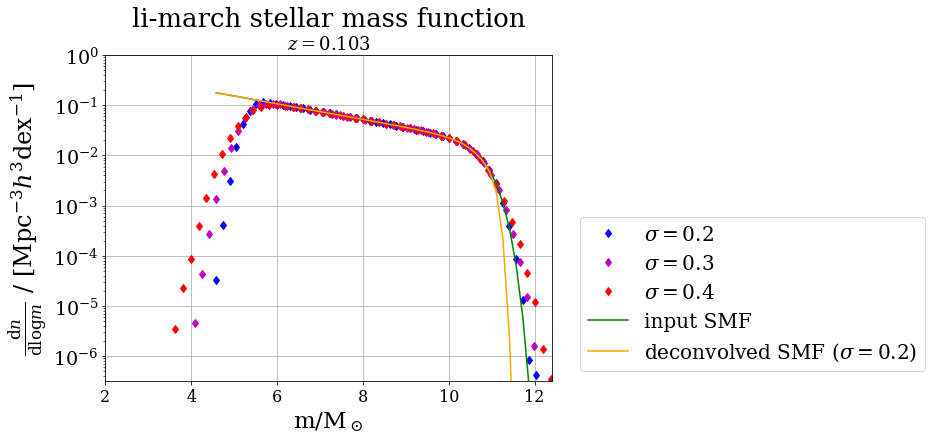

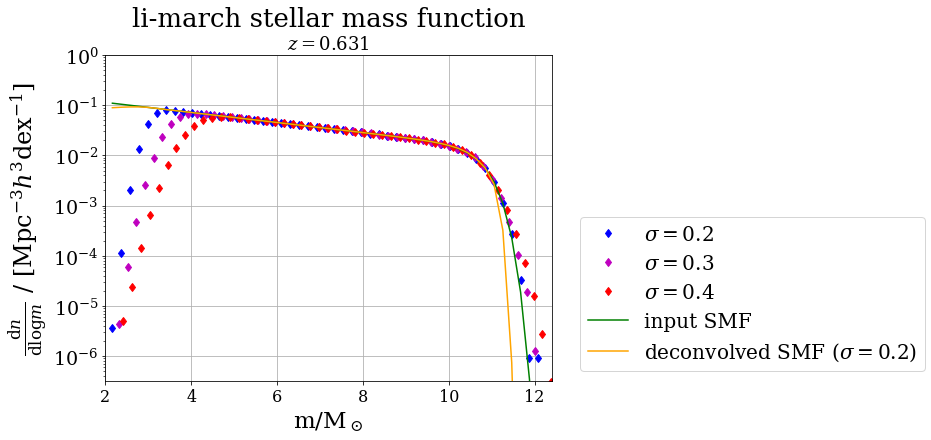

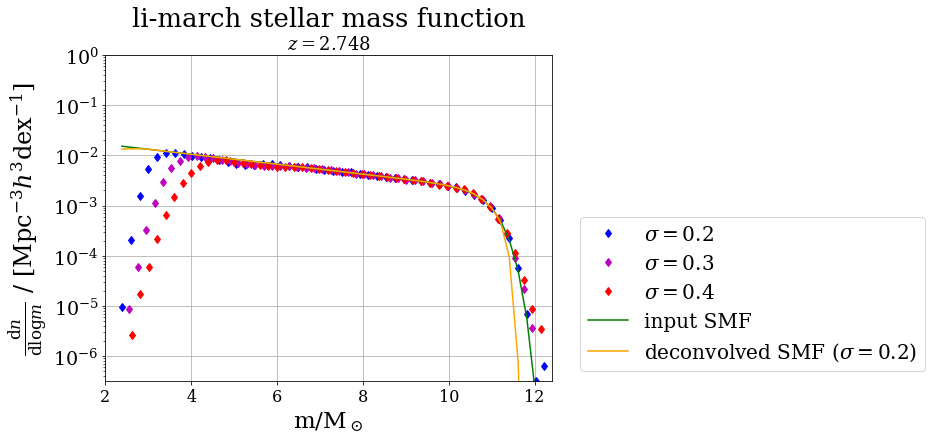

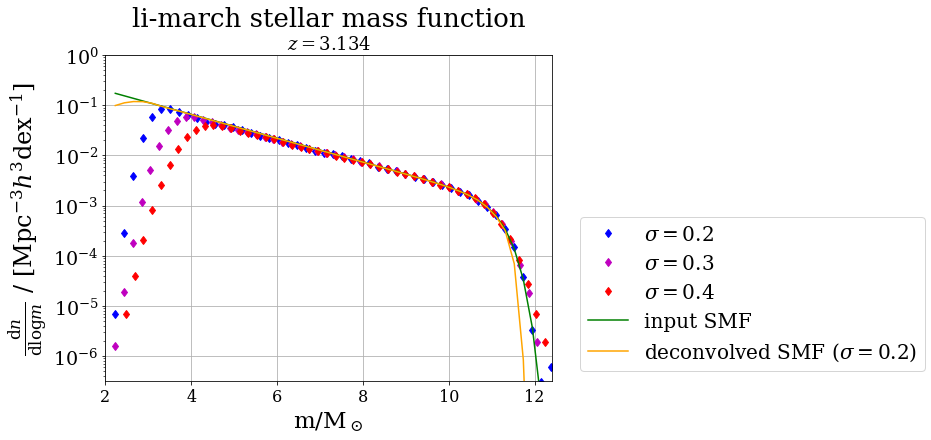

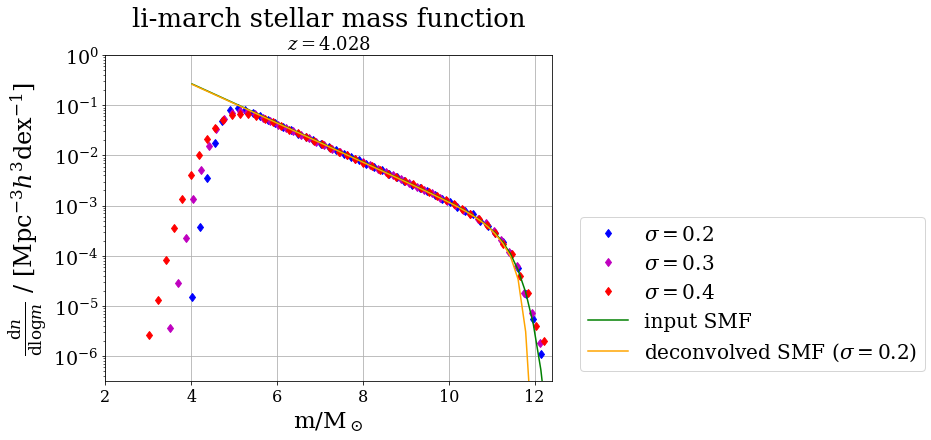

In [188]:
for s in [2,10,27,29,33]:
    z=tpm_const2.subcat.snap[s][1]
    smf=sham.SMFClass(tpm_const2.source,z,tpm_const2.scat,mmin=tpm_const2.mmin)
    #smf=sham.SMFClass('fontana',z)

    #midbins0,n0=tpm0.dndm(s,paramed=True)
    #midbins1,n1=tpm1.dndm(s,paramed=True)
    midbins2,n2=tpm_const2.dndm(s,paramed=True)
    midbins3,n3=tpm3.dndm(s,paramed=True)
    midbins4,n4=tpm4.dndm(s,paramed=True)
    smf_in=smf.dndm(midbins2)/smf.hubble**3.
    smf_deconv=smf.dndm_scat(midbins2)/smf.hubble**3.

    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(1,1,1)

    #ax.semilogy(midbins0,n0,'cd',
    #            label='$\sigma=0.0$')
    #ax.semilogy(midbins1,n1,'kd',
    #            label='$\sigma=0.1$')
    ax.semilogy(midbins2,n2,'bd',
                label='$\sigma=0.2$')
    ax.semilogy(midbins3,n3,'md',
                label='$\sigma=0.3$')
    ax.semilogy(midbins4,n4,'rd',
                label='$\sigma=0.4$')
    ax.semilogy(midbins2,smf_in,'g-',
                label='input SMF')
    ax.semilogy(midbins2,smf_deconv,'-',
                color='orange',
                label='deconvolved SMF ($\sigma=0.2$)')
    ax.set_title('{0} stellar mass function'.format(tpm_const2.source),y=1.07)
    ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
                  '[Mpc$^{-3}h^3$dex$^{-1}$]',
                  fontsize=24)
    ax.text(0.5,1.02,'$z=${0:0.3f}'.format(z),
            transform=ax.transAxes,ha='center',fontsize=18)
    ax.set_xlabel('m/M$_\odot$')
    ax.tick_params(axis='both')
    ax.set_xlim(2,12.4)
    ax.set_ylim(1.*10.**(-6.5),1)
    ax.legend(bbox_to_anchor=(1.04,0), loc="lower left")

    plt.show()

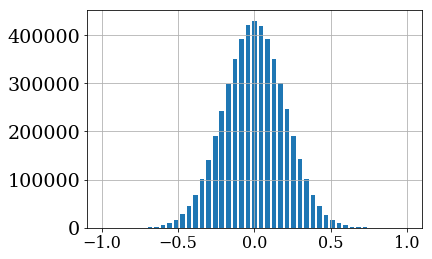

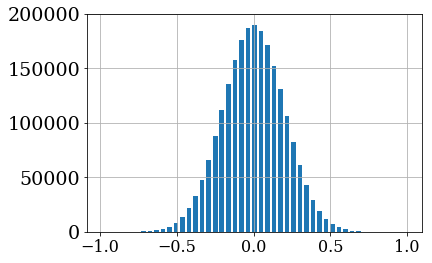

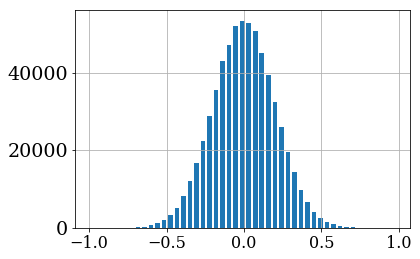

In [140]:
for s in [2,15,33]:
    scats=tpm_const2.subcat[s]['scat']
    isnan=np.isnan(scats)
    scats_notnan=scats[~isnan]
    plt.hist(scats_notnan,47,rwidth=0.7)
    plt.show()

In [177]:
zi=27
hms=tpm_const2.subcat[zi]['m.max']
his=np.arange(len(hms))
his=his[hms>0]
scats=tpm_const2.subcat[zi]['scat'][his]
isnan=np.isnan(scats)
nan_is=his[isnan]
tree_is=indices_tree(tpm_const2.subcat,zi,zi-1,nan_is)
hasfam=tree_is>=0
print np.sum(hasfam)
famscat=tpm_const2.subcat[zi-1]['scat'][tree_is[hasfam]]
is_nanfam=np.where(np.isnan(famscat))

print np.where(fam_isnan)
print np.sum(fam_isnan)
print hasfam[0]

hasfam[is_nanfam]=False

#hasfam[hasfam][fam_isnan]=False

print hasfam[0]
print np.sum(hasfam)
print('{0:d} halos with positive mass\n'
      '{1:d} of those have nan scat values\n'
      '{2:d} have family'.\
      format(len(scats),np.sum(isnan),np.sum(hasfam)))
print np.sum(fam_isnan)
tpm_const2.subcat[zi-1]['scat'][tree_is[hasfam]]

3587891
(array([      0,       1,       2, ..., 3587888, 3587889, 3587890]),)
3556934
True
False
139803
4104288 halos with positive mass
3697557 of those have nan scat values
139803 have family
3556934


array([nan, nan, nan, ..., nan, nan, nan])

# SHAM Comps

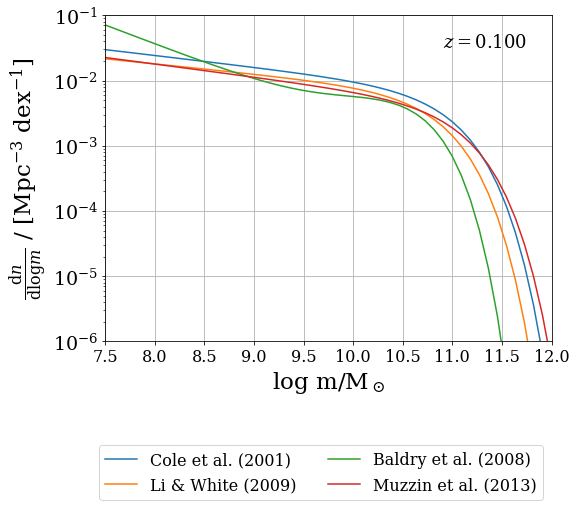

In [8]:
z=0.1
maxis=np.linspace(6,15,100)

col=sham.SMFClass('cole-march',z)
li=sham.SMFClass('li',z)
bal=sham.SMFClass('baldry',z)
muz=sham.SMFClass('muzzin',z)
#dunc=sham.SMFClass('duncan',z)
#limarch=sham.SMFClass('li-march',z)
#font=sham.SMFClass('fontana',z)
#cap=sham.SMFClass('caputi',z)
#lee=sham.SMFClass('lee',z)
#sant=sham.SMFClass('santini',z)
#per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(maxis)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

ax.semilogy(maxis,col.dndm(maxis),
            label='Cole et al. (2001)')
ax.semilogy(maxis,li.dndm(maxis),
            label='Li & White (2009)')
ax.semilogy(maxis,bal.dndm(maxis),
            label='Baldry et al. (2008)')
ax.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
#ax.semilogy(maxis,dunc.dndm(maxis),
#            label='Dunan et al. (2014)')
#ax.semilogy(maxis,limarch.dndm(maxis),
#            label='Marchesini et al. (2009)')
#ax.semilogy(maxis,font.dndm(maxis),
#            label='Fontana et al. (2006)')
#ax.semilogy(maxis,cap.dndm(maxis),
#            label='Caputi et al. (2011)')
#ax.semilogy(maxis,lee.dndm(maxis),
#            label='Lee et al. (2012)')
#ax.semilogy(maxis,sant.dndm(maxis),
#            label='Santini et al. (2012)')

#ax.set_title('Stellar mass functions',
#             y=1.05)
ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax.text(0.85,0.9,'$z=${0:0.3f}'.format(z),
        transform=ax.transAxes,
        fontsize=18,ha='center')
ax.set_xlabel('log m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend(bbox_to_anchor=(0.5,-.26),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2,fontsize=16)
ax.set_ylim(1e-6,1e-1)
ax.set_xlim(7.5,12)

plt.show()

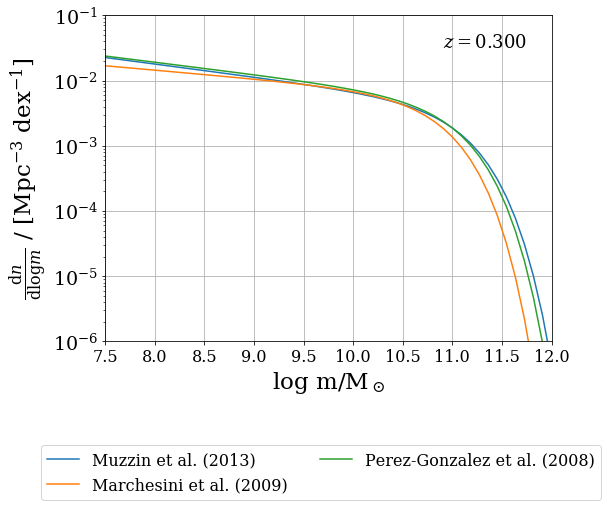

In [10]:
z=0.3
maxis=np.linspace(6,15,100)

#col=sham.SMFClass('cole-march',z)
#li=sham.SMFClass('li',z)
#bal=sham.SMFClass('baldry',z)
muz=sham.SMFClass('muzzin',z)
#dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
#font=sham.SMFClass('fontana',z)
#cap=sham.SMFClass('caputi',z)
#lee=sham.SMFClass('lee',z)
#sant=sham.SMFClass('santini',z)
per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(maxis)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

#ax.semilogy(maxis,col.dndm(maxis),
#            label='Cole et al. (2001)')
#ax.semilogy(maxis,li.dndm(maxis),
#            label='Li & White (2009)')
#ax.semilogy(maxis,bal.dndm(maxis),
#            label='Baldry et al. (2008)')
ax.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
#ax.semilogy(maxis,dunc.dndm(maxis),
#            label='Dunan et al. (2014)')
ax.semilogy(maxis,limarch.dndm(maxis),
            label='Marchesini et al. (2009)')
#ax.semilogy(maxis,font.dndm(maxis),
#            label='Fontana et al. (2006)')
#ax.semilogy(maxis,cap.dndm(maxis),
#            label='Caputi et al. (2011)')
#ax.semilogy(maxis,lee.dndm(maxis),
#            label='Lee et al. (2012)')
#ax.semilogy(maxis,sant.dndm(maxis),
#            label='Santini et al. (2012)')
ax.semilogy(maxis,per.dndm(maxis),
            label='Perez-Gonzalez et al. (2008)')

#ax.set_title('Stellar mass functions',
#             y=1.05)
ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax.text(0.85,0.9,'$z=${0:0.3f}'.format(z),
        transform=ax.transAxes,
        fontsize=18,ha='center')
ax.set_xlabel('log m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend(bbox_to_anchor=(0.5,-.26),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2,fontsize=16)
ax.set_ylim(1e-6,1e-1)
ax.set_xlim(7.5,12)

plt.show()

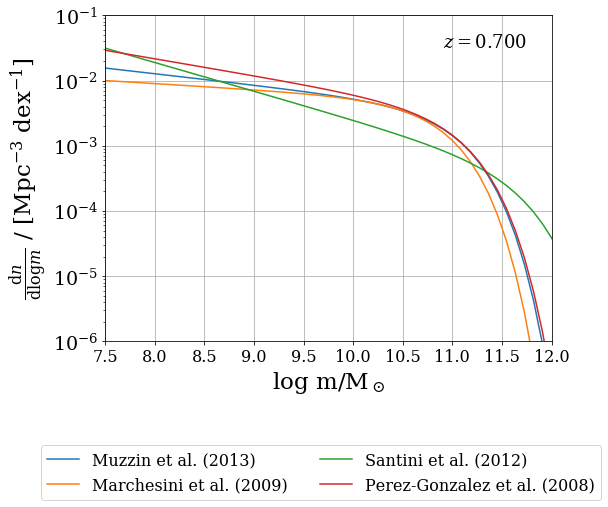

In [12]:
z=0.7
maxis=np.linspace(6,15,100)

#col=sham.SMFClass('cole-march',z)
#li=sham.SMFClass('li',z)
#bal=sham.SMFClass('baldry',z)
muz=sham.SMFClass('muzzin',z)
#dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
#font=sham.SMFClass('fontana',z)
#cap=sham.SMFClass('caputi',z)
#lee=sham.SMFClass('lee',z)
sant=sham.SMFClass('santini',z)
per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(maxis)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

#ax.semilogy(maxis,col.dndm(maxis),
#            label='Cole et al. (2001)')
#ax.semilogy(maxis,li.dndm(maxis),
#            label='Li & White (2009)')
#ax.semilogy(maxis,bal.dndm(maxis),
#            label='Baldry et al. (2008)')
ax.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
#ax.semilogy(maxis,dunc.dndm(maxis),
#            label='Dunan et al. (2014)')
ax.semilogy(maxis,limarch.dndm(maxis),
            label='Marchesini et al. (2009)')
#ax.semilogy(maxis,font.dndm(maxis),
#            label='Fontana et al. (2006)')
#ax.semilogy(maxis,cap.dndm(maxis),
#            label='Caputi et al. (2011)')
#ax.semilogy(maxis,lee.dndm(maxis),
#            label='Lee et al. (2012)')
ax.semilogy(maxis,sant.dndm(maxis),
            label='Santini et al. (2012)')
ax.semilogy(maxis,per.dndm(maxis),
            label='Perez-Gonzalez et al. (2008)')

#ax.set_title('Stellar mass functions',
#             y=1.05)
ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax.text(0.85,0.9,'$z=${0:0.3f}'.format(z),
        transform=ax.transAxes,
        fontsize=18,ha='center')
ax.set_xlabel('log m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend(bbox_to_anchor=(0.5,-.26),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2,fontsize=16)
ax.set_ylim(1e-6,1e-1)
ax.set_xlim(7.5,12)

plt.show()

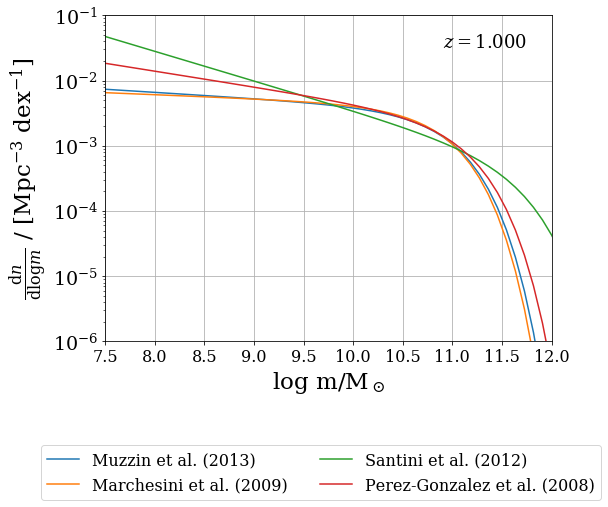

In [11]:
z=1.
maxis=np.linspace(6,15,100)

#col=sham.SMFClass('cole-march',z)
#li=sham.SMFClass('li',z)
#bal=sham.SMFClass('baldry',z)
muz=sham.SMFClass('muzzin',z)
#dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
#font=sham.SMFClass('fontana',z)
#cap=sham.SMFClass('caputi',z)
#lee=sham.SMFClass('lee',z)
sant=sham.SMFClass('santini',z)
per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(maxis)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

#ax.semilogy(maxis,col.dndm(maxis),
#            label='Cole et al. (2001)')
#ax.semilogy(maxis,li.dndm(maxis),
#            label='Li & White (2009)')
#ax.semilogy(maxis,bal.dndm(maxis),
#            label='Baldry et al. (2008)')
ax.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
#ax.semilogy(maxis,dunc.dndm(maxis),
#            label='Dunan et al. (2014)')
ax.semilogy(maxis,limarch.dndm(maxis),
            label='Marchesini et al. (2009)')
#ax.semilogy(maxis,font.dndm(maxis),
#            label='Fontana et al. (2006)')
#ax.semilogy(maxis,cap.dndm(maxis),
#            label='Caputi et al. (2011)')
#ax.semilogy(maxis,lee.dndm(maxis),
#            label='Lee et al. (2012)')
ax.semilogy(maxis,sant.dndm(maxis),
            label='Santini et al. (2012)')
ax.semilogy(maxis,per.dndm(maxis),
            label='Perez-Gonzalez et al. (2008)')

#ax.set_title('Stellar mass functions',
#             y=1.05)
ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax.text(0.85,0.9,'$z=${0:0.3f}'.format(z),
        transform=ax.transAxes,
        fontsize=18,ha='center')
ax.set_xlabel('log m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend(bbox_to_anchor=(0.5,-.26),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2,fontsize=16)
ax.set_ylim(1e-6,1e-1)
ax.set_xlim(7.5,12)

plt.show()

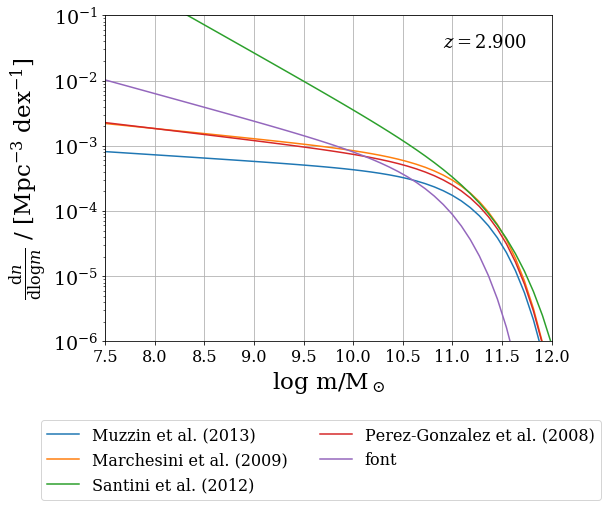

In [20]:
z=2.9
maxis=np.linspace(6,15,100)

#col=sham.SMFClass('cole-march',z)
#li=sham.SMFClass('li',z)
#bal=sham.SMFClass('baldry',z)
muz=sham.SMFClass('muzzin',z)
#dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
#font=sham.SMFClass('fontana',z)
#cap=sham.SMFClass('caputi',z)
#lee=sham.SMFClass('lee',z)
sant=sham.SMFClass('santini',z)
per=sham.SMFClass('perez',z)
font=sham.SMFClass('fontana',z)

dndlm_muz=muz.dndm(maxis)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

#ax.semilogy(maxis,col.dndm(maxis),
#            label='Cole et al. (2001)')
#ax.semilogy(maxis,li.dndm(maxis),
#            label='Li & White (2009)')
#ax.semilogy(maxis,bal.dndm(maxis),
#            label='Baldry et al. (2008)')
ax.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
#ax.semilogy(maxis,dunc.dndm(maxis),
#            label='Dunan et al. (2014)')
ax.semilogy(maxis,limarch.dndm(maxis),
            label='Marchesini et al. (2009)')
#ax.semilogy(maxis,font.dndm(maxis),
#            label='Fontana et al. (2006)')
#ax.semilogy(maxis,cap.dndm(maxis),
#            label='Caputi et al. (2011)')
#ax.semilogy(maxis,lee.dndm(maxis),
#            label='Lee et al. (2012)')
ax.semilogy(maxis,sant.dndm(maxis),
            label='Santini et al. (2012)')
ax.semilogy(maxis,per.dndm(maxis),
            label='Perez-Gonzalez et al. (2008)')
ax.semilogy(maxis,font.dndm(maxis),
            label='font')

#ax.set_title('Stellar mass functions',
#             y=1.05)
ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax.text(0.85,0.9,'$z=${0:0.3f}'.format(z),
        transform=ax.transAxes,
        fontsize=18,ha='center')
ax.set_xlabel('log m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend(bbox_to_anchor=(0.5,-.26),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2,fontsize=16)
ax.set_ylim(1e-6,1e-1)
ax.set_xlim(7.5,12)

plt.show()

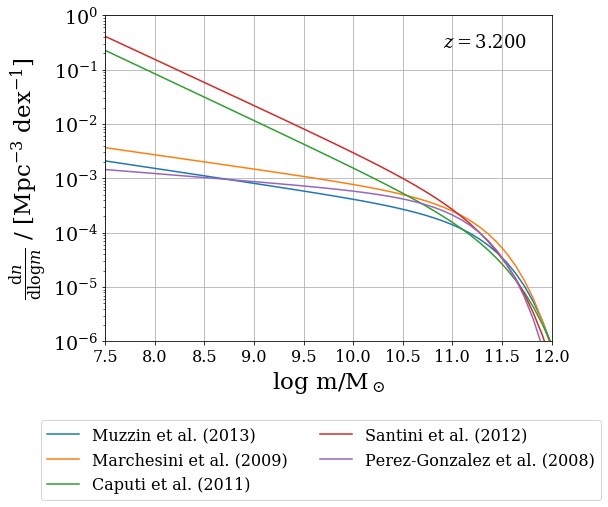

In [17]:
z=3.2
maxis=np.linspace(6,15,100)

#col=sham.SMFClass('cole-march',z)
#li=sham.SMFClass('li',z)
#bal=sham.SMFClass('baldry',z)
muz=sham.SMFClass('muzzin',z)
#dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
#font=sham.SMFClass('fontana',z)
cap=sham.SMFClass('caputi',z)
#lee=sham.SMFClass('lee',z)
sant=sham.SMFClass('santini',z)
per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(maxis)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

#ax.semilogy(maxis,col.dndm(maxis),
#            label='Cole et al. (2001)')
#ax.semilogy(maxis,li.dndm(maxis),
#            label='Li & White (2009)')
#ax.semilogy(maxis,bal.dndm(maxis),
#            label='Baldry et al. (2008)')
ax.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
#ax.semilogy(maxis,dunc.dndm(maxis),
#            label='Dunan et al. (2014)')
ax.semilogy(maxis,limarch.dndm(maxis),
            label='Marchesini et al. (2009)')
#ax.semilogy(maxis,font.dndm(maxis),
#            label='Fontana et al. (2006)')
ax.semilogy(maxis,cap.dndm(maxis),
            label='Caputi et al. (2011)')
#ax.semilogy(maxis,lee.dndm(maxis),
#            label='Lee et al. (2012)')
ax.semilogy(maxis,sant.dndm(maxis),
            label='Santini et al. (2012)')
ax.semilogy(maxis,per.dndm(maxis),
            label='Perez-Gonzalez et al. (2008)')

#ax.set_title('Stellar mass functions',
#             y=1.05)
ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax.text(0.85,0.9,'$z=${0:0.3f}'.format(z),
        transform=ax.transAxes,
        fontsize=18,ha='center')
ax.set_xlabel('log m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend(bbox_to_anchor=(0.5,-.26),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2,fontsize=16)
ax.set_ylim(1e-6,1)
ax.set_xlim(7.5,12)

plt.show()

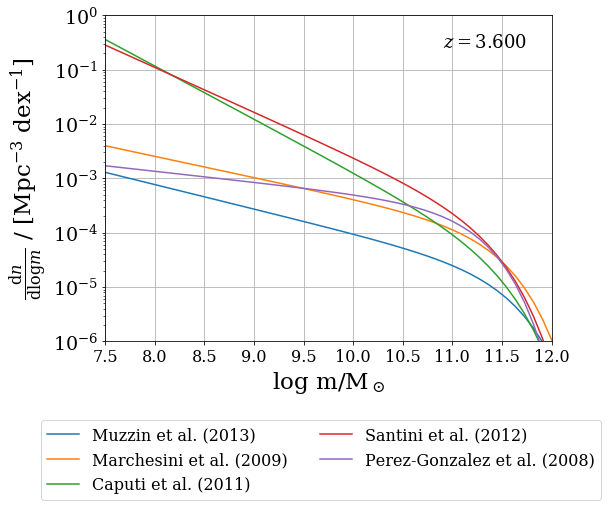

In [19]:
z=3.6
maxis=np.linspace(6,15,100)

#col=sham.SMFClass('cole-march',z)
#li=sham.SMFClass('li',z)
#bal=sham.SMFClass('baldry',z)
muz=sham.SMFClass('muzzin',z)
#dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
#font=sham.SMFClass('fontana',z)
cap=sham.SMFClass('caputi',z)
#lee=sham.SMFClass('lee',z)
sant=sham.SMFClass('santini',z)
per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(maxis)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

#ax.semilogy(maxis,col.dndm(maxis),
#            label='Cole et al. (2001)')
#ax.semilogy(maxis,li.dndm(maxis),
#            label='Li & White (2009)')
#ax.semilogy(maxis,bal.dndm(maxis),
#            label='Baldry et al. (2008)')
ax.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
#ax.semilogy(maxis,dunc.dndm(maxis),
#            label='Dunan et al. (2014)')
ax.semilogy(maxis,limarch.dndm(maxis),
            label='Marchesini et al. (2009)')
#ax.semilogy(maxis,font.dndm(maxis),
#            label='Fontana et al. (2006)')
ax.semilogy(maxis,cap.dndm(maxis),
            label='Caputi et al. (2011)')
#ax.semilogy(maxis,lee.dndm(maxis),
#            label='Lee et al. (2012)')
ax.semilogy(maxis,sant.dndm(maxis),
            label='Santini et al. (2012)')
ax.semilogy(maxis,per.dndm(maxis),
            label='Perez-Gonzalez et al. (2008)')

#ax.set_title('Stellar mass functions',
#             y=1.05)
ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax.text(0.85,0.9,'$z=${0:0.3f}'.format(z),
        transform=ax.transAxes,
        fontsize=18,ha='center')
ax.set_xlabel('log m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend(bbox_to_anchor=(0.5,-.26),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2,fontsize=16)
ax.set_ylim(1e-6,1)
ax.set_xlim(7.5,12)

plt.show()

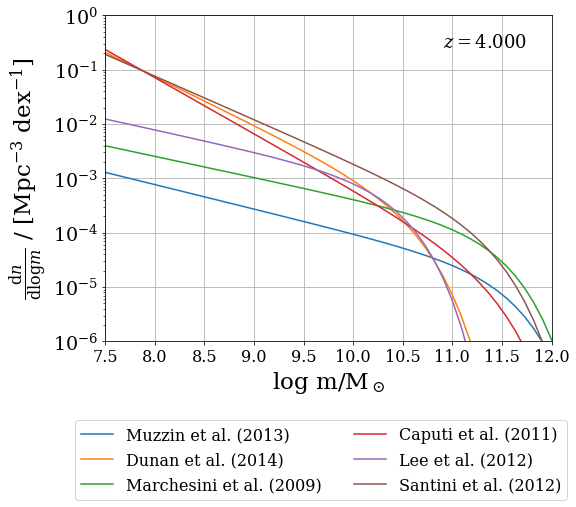

In [18]:
z=4.
maxis=np.linspace(6,15,100)

#col=sham.SMFClass('cole-march',z)
#li=sham.SMFClass('li',z)
#bal=sham.SMFClass('baldry',z)
muz=sham.SMFClass('muzzin',z)
dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
#font=sham.SMFClass('fontana',z)
cap=sham.SMFClass('caputi',z)
lee=sham.SMFClass('lee',z)
sant=sham.SMFClass('santini',z)
#per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(maxis)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

#ax.semilogy(maxis,col.dndm(maxis),
#            label='Cole et al. (2001)')
#ax.semilogy(maxis,li.dndm(maxis),
#            label='Li & White (2009)')
#ax.semilogy(maxis,bal.dndm(maxis),
#            label='Baldry et al. (2008)')
ax.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
ax.semilogy(maxis,dunc.dndm(maxis),
            label='Dunan et al. (2014)')
ax.semilogy(maxis,limarch.dndm(maxis),
            label='Marchesini et al. (2009)')
#ax.semilogy(maxis,font.dndm(maxis),
#            label='Fontana et al. (2006)')
ax.semilogy(maxis,cap.dndm(maxis),
            label='Caputi et al. (2011)')
ax.semilogy(maxis,lee.dndm(maxis),
            label='Lee et al. (2012)')
ax.semilogy(maxis,sant.dndm(maxis),
            label='Santini et al. (2012)')
#ax.semilogy(maxis,per.dndm(maxis),
#            label='Perez-Gonzalez et al. (2008)')

#ax.set_title('Stellar mass functions',
#             y=1.05)
ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax.text(0.85,0.9,'$z=${0:0.3f}'.format(z),
        transform=ax.transAxes,
        fontsize=18,ha='center')
ax.set_xlabel('log m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend(bbox_to_anchor=(0.5,-.26),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2,fontsize=16)
ax.set_ylim(1e-6,1)
ax.set_xlim(7.5,12)

plt.show()

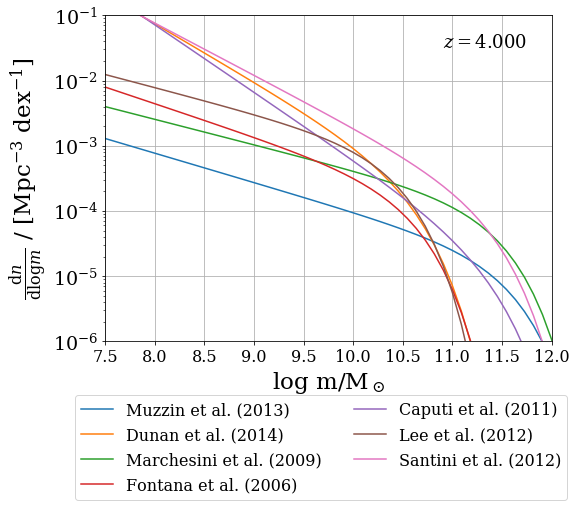

In [11]:
z=4.
maxis=np.linspace(6,15,100)

muz=sham.SMFClass('muzzin',z)
dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
font=sham.SMFClass('fontana',z)
cap=sham.SMFClass('caputi',z)
lee=sham.SMFClass('lee',z)
sant=sham.SMFClass('santini',z)
#per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(maxis)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

ax.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
ax.semilogy(maxis,dunc.dndm(maxis),
            label='Dunan et al. (2014)')
ax.semilogy(maxis,limarch.dndm(maxis),
            label='Marchesini et al. (2009)')
ax.semilogy(maxis,font.dndm(maxis),
            label='Fontana et al. (2006)')
ax.semilogy(maxis,cap.dndm(maxis),
            label='Caputi et al. (2011)')
ax.semilogy(maxis,lee.dndm(maxis),
            label='Lee et al. (2012)')
ax.semilogy(maxis,sant.dndm(maxis),
            label='Santini et al. (2012)')

#ax.set_title('Stellar mass functions',
#             y=1.05)
ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax.text(0.85,0.9,'$z=${0:0.3f}'.format(z),
        transform=ax.transAxes,
        fontsize=18,ha='center')
ax.set_xlabel('log m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend(bbox_to_anchor=(0.5,-.26),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2,fontsize=16)
ax.set_ylim(1e-6,1e-1)
ax.set_xlim(7.5,12)

plt.show()

In [ ]:
z=0.6
maxis=np.linspace(6,15,100)

muz=sham.SMFClass('muzzin',z)
#dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
#font=sham.SMFClass('fontana',z)
#cap=sham.SMFClass('caputi',z)
#lee=sham.SMFClass('lee',z)
sant=sham.SMFClass('santini',z)
per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(maxis)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

ax.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
ax.semilogy(maxis,limarch.dndm(maxis),
            label='Li & White (2012)')
ax.semilogy(maxis,sant.dndm(maxis),
            label='Santini et al. (2012)')
ax.semilogy(maxis,per.dndm(maxis),
            label='Perez-Gonzalez, et al. (2008)')

#ax.set_title('Stellar mass functions',y=1.05)
ax.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax.text(0.85,0.9,'$z=${0:0.3f}'.format(z),
        transform=ax.transAxes,
        fontsize=18,ha='center')
ax.set_xlabel('log m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend(fontsize=16)
ax.set_ylim(1e-6,1e-1)
ax.set_xlim(7.5,12)

plt.show()

# SMF Presentation Plot

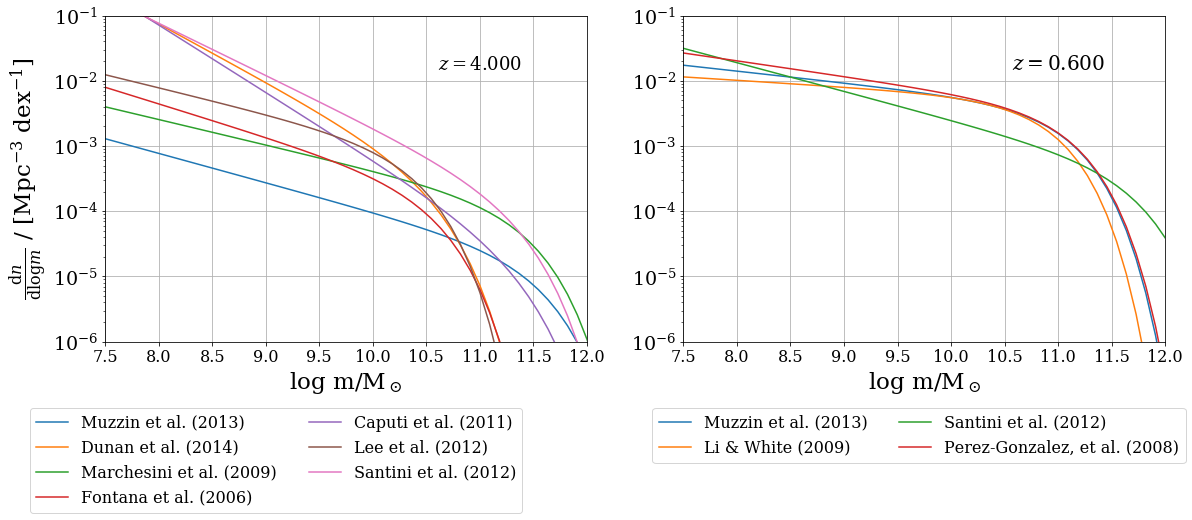

In [13]:
z=4.
max1is=np.linspace(6,15,100)

muz=sham.SMFClass('muzzin',z)
dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
font=sham.SMFClass('fontana',z)
cap=sham.SMFClass('caputi',z)
lee=sham.SMFClass('lee',z)
sant=sham.SMFClass('santini',z)
#per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(max1is)

fig=plt.figure(figsize=(19,6))
ax1=fig.add_subplot(1,2,1)

ax1.semilogy(max1is,muz.dndm(max1is),
            label='Muzzin et al. (2013)')
ax1.semilogy(max1is,dunc.dndm(max1is),
            label='Dunan et al. (2014)')
ax1.semilogy(max1is,limarch.dndm(max1is),
            label='Marchesini et al. (2009)')
ax1.semilogy(max1is,font.dndm(max1is),
            label='Fontana et al. (2006)')
ax1.semilogy(max1is,cap.dndm(max1is),
            label='Caputi et al. (2011)')
ax1.semilogy(max1is,lee.dndm(max1is),
            label='Lee et al. (2012)')
ax1.semilogy(max1is,sant.dndm(max1is),
            label='Santini et al. (2012)')
#ax1.semilogy(max1is,per.dndm(max1is),
#            label=per.source)

#ax1.set_title('Stellar mass functions',
#             y=1.05)
ax1.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
              '[Mpc$^{-3}$ dex$^{-1}$]')
ax1.text(11,1.5e-2,'$z=${0:0.3f}'.format(z),
        fontsize=18,ha='center')
ax1.set_xlabel('log m/M$_\odot$')
ax1.tick_params(axis='both')
#ax1.legend(bbox_to_anchor=(0.05,-.01),
ax1.legend(bbox_to_anchor=(0.25,-.01),
          bbox_transform=fig.transFigure,
          loc="upper center",ncol=2,fontsize=16)
ax1.set_ylim(1e-6,1e-1)
ax1.set_xlim(7.5,12)

##########################################################
z=0.6
maxis=np.linspace(6,15,100)

muz=sham.SMFClass('muzzin',z)
#dunc=sham.SMFClass('duncan',z)
limarch=sham.SMFClass('li-march',z)
#font=sham.SMFClass('fontana',z)
#cap=sham.SMFClass('caputi',z)
#lee=sham.SMFClass('lee',z)
sant=sham.SMFClass('santini',z)
per=sham.SMFClass('perez',z)

dndlm_muz=muz.dndm(maxis)

ax2=fig.add_subplot(1,2,2)

ax2.semilogy(maxis,muz.dndm(maxis),
            label='Muzzin et al. (2013)')
ax2.semilogy(maxis,limarch.dndm(maxis),
            label='Li & White (2009)')
ax2.semilogy(maxis,sant.dndm(maxis),
            label='Santini et al. (2012)')
ax2.semilogy(maxis,per.dndm(maxis),
            label='Perez-Gonzalez, et al. (2008)')

#ax2.set_title('Stellar mass functions',y=1.05)
#ax2.set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
#              '[Mpc$^{-3}$ dex$^{-1}$]',
#              fontsize=14)
ax2.text(11,1.5e-2,'$z=${0:0.3f}'.format(z),
        fontsize=20,ha='center')
ax2.set_xlabel('log m/M$_\odot$')
ax2.tick_params(axis='both')
#ax2.legend(bbox_to_anchor=(0.5,-.01),
ax2.legend(bbox_to_anchor=(0.72,-.01),
          bbox_transform=fig.transFigure,
          loc="upper center",ncol=2,
          fontsize=16)
ax2.set_ylim(1e-6,1e-1)
ax2.set_xlim(7.5,12)

plt.show()

# HMF

In [57]:
catalog_kind='subhalo'
cat=mm.Mergerdata(12.,np.inf,catalog_kind=catalog_kind)

# in subhalo_io_hack.Treepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_1

In [24]:
'''
m0_000,n0_000=np.loadtxt('mVector_z0_000.txt',skiprows=12,unpack=True,usecols=[0,7])
m0_631,n0_631=np.loadtxt('mVector_z0_631.txt',skiprows=12,unpack=True,usecols=[0,7])
m1_661,n1_661=np.loadtxt('mVector_z1_661.txt',skiprows=12,unpack=True,usecols=[0,7])
m4_280,n4_280=np.loadtxt('mVector_z4_280.txt',skiprows=12,unpack=True,usecols=[0,7])

m0_000_3,n0_000_3=np.loadtxt('mVector_WMAP3_z0_000.txt',skiprows=12,unpack=True,usecols=[0,7])
m0_631_3,n0_631_3=np.loadtxt('mVector_WMAP3_z0_631.txt',skiprows=12,unpack=True,usecols=[0,7])
m1_661_3,n1_661_3=np.loadtxt('mVector_WMAP3_z1_661.txt',skiprows=12,unpack=True,usecols=[0,7])
m4_280_3,n4_280_3=np.loadtxt('mVector_WMAP3_z4_280.txt',skiprows=12,unpack=True,usecols=[0,7])

m0_000_c,n0_000_c=np.loadtxt('mVector_cust_z0_000.txt',skiprows=12,unpack=True,usecols=[0,7])
m0_631_c,n0_631_c=np.loadtxt('mVector_cust_z0_631.txt',skiprows=12,unpack=True,usecols=[0,7])
m1_661_c,n1_661_c=np.loadtxt('mVector_cust_z1_661.txt',skiprows=12,unpack=True,usecols=[0,7])
m4_280_c,n4_280_c=np.loadtxt('mVector_cust_z4_280.txt',skiprows=12,unpack=True,usecols=[0,7])

m0_000_corr,n0_000_corr=np.loadtxt('mVector_correct_z0_000.txt',skiprows=12,unpack=True,usecols=[0,7])
m0_631_corr,n0_631_corr=np.loadtxt('mVector_correct_z0_631.txt',skiprows=12,unpack=True,usecols=[0,7])
m1_661_corr,n1_661_corr=np.loadtxt('mVector_correct_z1_661.txt',skiprows=12,unpack=True,usecols=[0,7])
m4_280_corr,n4_280_corr=np.loadtxt('mVector_correct_z4_280.txt',skiprows=12,unpack=True,usecols=[0,7])

m0_000_corr_t,n0_000_corr_t=np.loadtxt('mVector_correct2z0_000.txt',skiprows=12,unpack=True,usecols=[0,7])
m0_631_corr_t,n0_631_corr_t=np.loadtxt('mVector_correct2z0_631.txt',skiprows=12,unpack=True,usecols=[0,7])
m1_661_corr_t,n1_661_corr_t=np.loadtxt('mVector_correct2z1_661.txt',skiprows=12,unpack=True,usecols=[0,7])
m4_280_corr_t,n4_280_corr_t=np.loadtxt('mVector_correct2z4_280.txt',skiprows=12,unpack=True,usecols=[0,7])
'''

m0_000_corr_t2,n0_000_corr_t2=np.loadtxt('dat/mVector_correct3z0_000.txt',skiprows=12,unpack=True,usecols=[0,7])
m0_631_corr_t2,n0_631_corr_t2=np.loadtxt('dat/mVector_correct3z0_631.txt',skiprows=12,unpack=True,usecols=[0,7])
m1_661_corr_t2,n1_661_corr_t2=np.loadtxt('dat/mVector_correct3z1_661.txt',skiprows=12,unpack=True,usecols=[0,7])
m4_280_corr_t2,n4_280_corr_t2=np.loadtxt('dat/mVector_correct3z4_280.txt',skiprows=12,unpack=True,usecols=[0,7])

In [49]:
print m4_280_corr_t2
print n4_280_corr_t2[:-46]

[1.00000000e+10 1.12201845e+10 1.25892541e+10 1.41253754e+10
 1.58489319e+10 1.77827941e+10 1.99526231e+10 2.23872114e+10
 2.51188643e+10 2.81838293e+10 3.16227766e+10 3.54813389e+10
 3.98107171e+10 4.46683592e+10 5.01187234e+10 5.62341325e+10
 6.30957344e+10 7.07945784e+10 7.94328235e+10 8.91250938e+10
 1.00000000e+11 1.12201845e+11 1.25892541e+11 1.41253754e+11
 1.58489319e+11 1.77827941e+11 1.99526231e+11 2.23872114e+11
 2.51188643e+11 2.81838293e+11 3.16227766e+11 3.54813389e+11
 3.98107171e+11 4.46683592e+11 5.01187234e+11 5.62341325e+11
 6.30957344e+11 7.07945784e+11 7.94328235e+11 8.91250938e+11
 1.00000000e+12 1.12201845e+12 1.25892541e+12 1.41253754e+12
 1.58489319e+12 1.77827941e+12 1.99526231e+12 2.23872114e+12
 2.51188643e+12 2.81838293e+12 3.16227766e+12 3.54813389e+12
 3.98107171e+12 4.46683592e+12 5.01187234e+12 5.62341325e+12
 6.30957344e+12 7.07945784e+12 7.94328235e+12 8.91250938e+12
 1.00000000e+13 1.12201845e+13 1.25892541e+13 1.41253754e+13
 1.58489319e+13 1.778279

In [60]:
n4_280_spl=interpolate.splrep(m4_280_corr_t2[:-46],n4_280_corr_t2[:-46])
print interpolate.splint(10.,15.,n4_280_spl)

-5914061255.34


In [76]:
dlogm=np.average(midbins34[1:]-midbins34[:-1])
np.sum(n34)*dlogm*(250.)**3.

1949321.0000000002

In [70]:
len(cat.cat[34]['m.max'])

2467383

<Figure size 432x288 with 0 Axes>

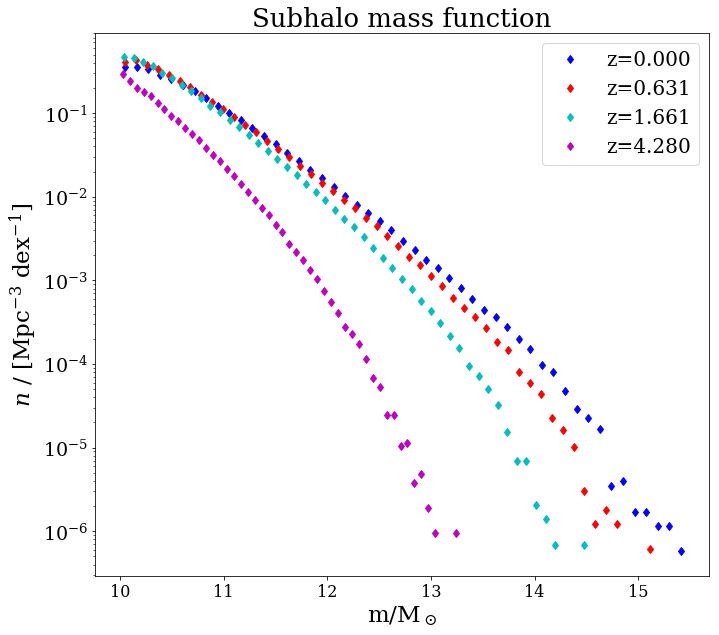

In [58]:
s1=0
s2=10
s3=20
s4=34

midbins0,n0=cat.halmassf(0)
midbins10,n10=cat.halmassf(10)
midbins20,n20=cat.halmassf(20)
midbins34,n34=cat.halmassf(34)

fig=plt.figure(figsize=(11,10))
ax=fig.add_subplot(1,1,1)

ax.semilogy(midbins0,n0,'bd',label='z={:0.3f}'.format(cat.zarray[0]))
ax.semilogy(midbins10,n10,'rd',label='z={:0.3f}'.format(cat.zarray[10]))
ax.semilogy(midbins20,n20,'cd',label='z={:0.3f}'.format(cat.zarray[20]))
ax.semilogy(midbins34,n34,'md',label='z={:0.3f}'.format(cat.zarray[34]))

ax.set_title('{0} mass function'.format(catalog_kind.capitalize()))
ax.set_ylabel('$n$ / [Mpc$^{-3}$ dex$^{-1}$]')
ax.set_xlabel('m/M$_\odot$')
ax.tick_params(axis='both')
ax.legend()
ax.grid()

plt.show()

# Testing HMFs versus Theory

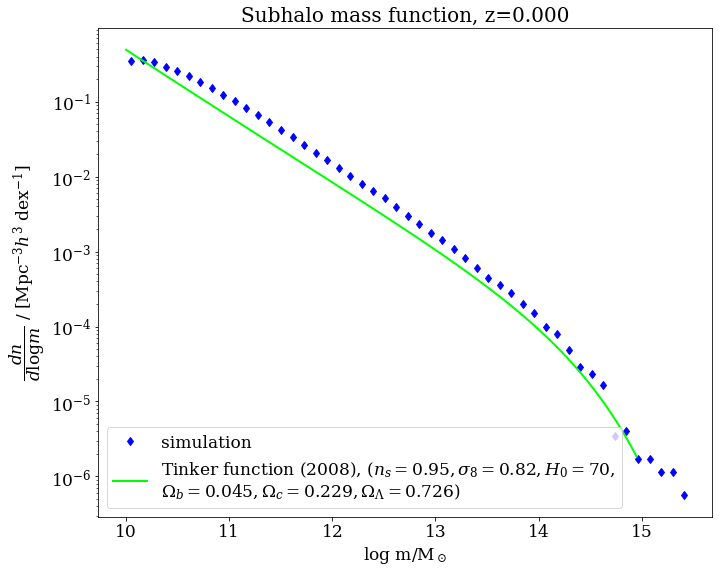

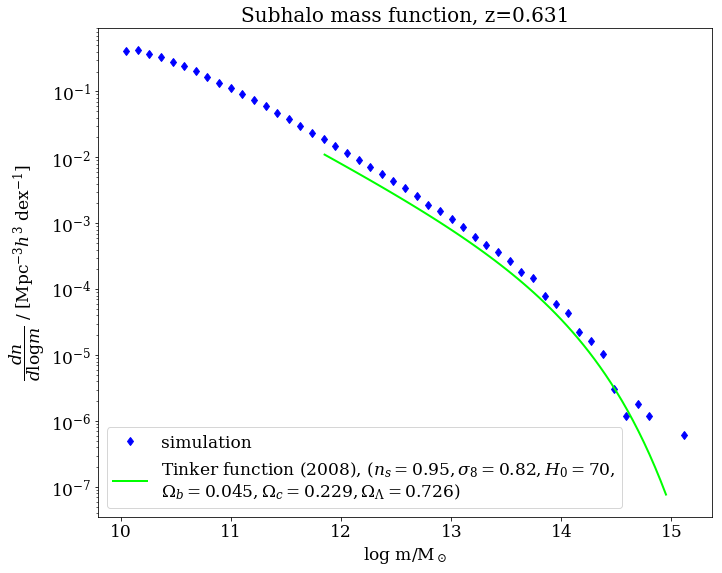

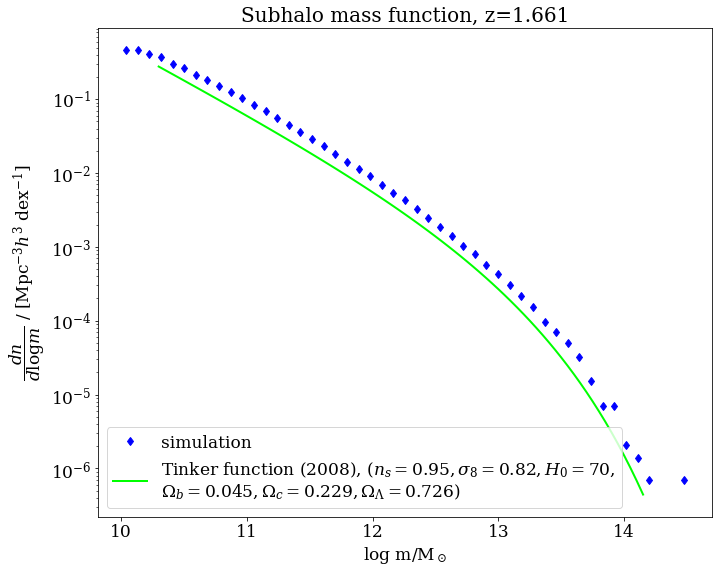

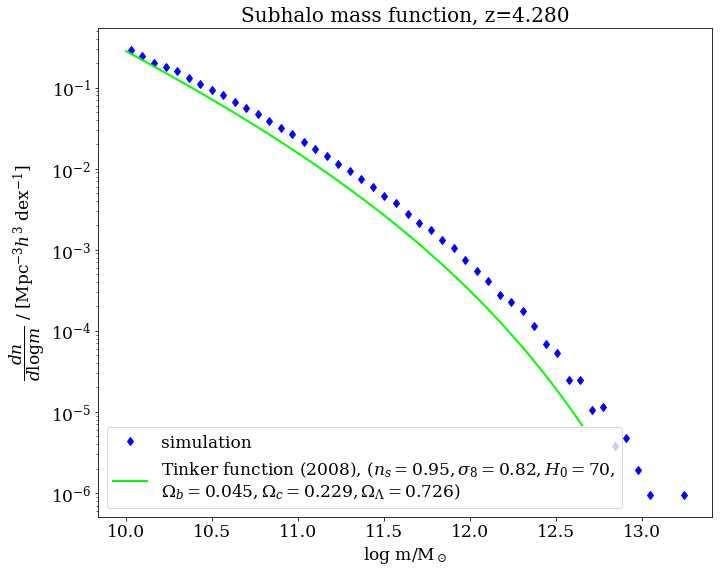

In [59]:
def compare(#mass, number density, snapshot index from my sim:
            m,n,s,
            #cosmology description(s) for theory curve:
            cosmo1,cosmo2=None,cosmo3=None,
            #masses and number densities from theory comps:
            cm1=None,cn1=None,
            cm2=None,cn2=None,
            cm3=None,cn3=None):
    fig=plt.figure(figsize=(11,9))
    ax=fig.add_subplot(1,1,1)

    ax.semilogy(m,n,'bd',label='simulation')
    greencol=(0.,255./255.,0./255.)
    ax.semilogy(cm1,cn1,'-',color=greencol,lw=2,
                label='Tinker function (2008), ('+cosmo1+')')
    if not cn2 is None:
        ax.semilogy(cm2,cn2,'m-',label='Tinker function, ('+cosmo2+')')
    if not cn3 is None:
        ax.semilogy(cm3,cn3,'r-',
                    label='Tinker function, ('+cosmo3)

    ax.set_title('{1} mass function, z={0:0.3f}'.format(cat.zarray[s],catalog_kind.capitalize()),fontsize=20)
    ax.set_ylabel('$\\dfrac{dn}{d\log m}$ / [Mpc$^{-3}h^3$ dex$^{-1}$]',fontsize=17)
    ax.set_xlabel('log m/M$_\odot$',fontsize=17)
    ax.tick_params(axis='both',labelsize=17)
    ax.legend(fontsize=17)
    ax.grid()
    plt.show()

cosmostr=str('$n_s=0.95,\sigma_8=0.82,H_0=70,$\n'
         '$\Omega_b=0.045,\Omega_c=0.229,\Omega_\Lambda=0.726$')

compare(midbins0,n0,s1,
        cosmostr,
        cm1=np.log10(m0_000_corr_t2),cn1=n0_000_corr_t2
        #,np.log10(m0_000_corr_t),n0_000_corr_t,
        #np.log10(m0_000_corr),n0_000_corr
       )
compare(midbins10,n10,s2,
        cosmostr,
        cm1=np.log10(m0_631_corr_t2),cn1=n0_631_corr_t2
        #np.log10(m0_631_corr_t),n0_631_corr_t,
        #np.log10(m0_631_corr),n0_631_corr,
        )
compare(midbins20,n20,s3,
        cosmostr,
        cm1=np.log10(m1_661_corr_t2),cn1=n1_661_corr_t2
        #np.log10(m1_661_corr_t),n1_661_corr_t,
        #np.log10(m1_661_corr),n1_661_corr,
        )
compare(midbins34,n34,s4,
        cosmostr,
        cm1=np.log10(m4_280_corr_t2),cn1=n4_280_corr_t2
        #np.log10(m4_280_corr_t),n4_280_corr_t,
        #np.log10(m4_280_corr),n4_280_corr,
        )

In [ ]:
def checkminmax(s):
    print('max log mass at z={0:0.2f}: {1:0.2f}'.format(cat.zarray[s],max(cat.cat[s][cat.mkind])))
    nonzero=cat.cat[s][cat.mkind]!=0.
    print('min log mass at z={0:0.2f}: {1:0.2f}'.format(cat.zarray[s],min(cat.cat[s][cat.mkind][nonzero])))
    print''

for zi in 2*np.arange(34/2):
    checkminmax(zi)

# SHMR

In [10]:
import merg_rates
#reload(merg_rates)
tpm2=merg_rates.shamedTreepmClass(0.2,source='li-march',shamziend=33)

# in merg_rates.shamedTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_

/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


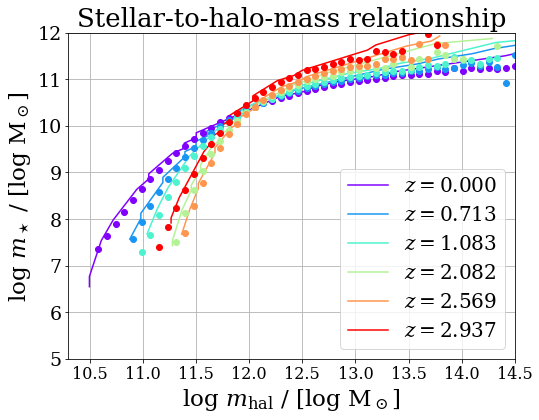

In [4]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
zis_plt=[0,11,15,23,26,28]
colors = mpl.cm.rainbow(np.linspace(0, 1, len(zis_plt)))
for zi,c in zip(zis_plt,colors):
    z=tpm2.subcat[zi].snap['z']
    ms_hal,ms_gal=tpm2.shmr_sham(zi)
    isnan=np.isnan(ms_hal)
    ax.plot(ms_hal[~isnan],ms_gal[~isnan],
            label='$z={0:0.3f}$'.format(z),color=c)

ms_hal=np.linspace(10.5,14.5,50)
Mwid=0.02
for zi,c in zip(zis_plt,colors):
    ms_hal_cat=tpm2.subcat[zi][tpm2.smtype]
    ms_gal_cat=tpm2.subcat[zi][tpm2.gmtype]
    
    notzero=ms_gal_cat>0
    notnan=~np.isnan(ms_gal_cat)
    ms_hal_cat=ms_hal_cat[notzero & notnan]
    ms_gal_cat=ms_gal_cat[notzero & notnan]
    
    ms_gal=np.zeros(len(ms_hal))
    for i,m_hal in enumerate(ms_hal):
        matches_m_hal=((ms_hal_cat<m_hal+Mwid)
                       &(ms_hal_cat>m_hal-Mwid))
        ms_gal[i]=np.average(ms_gal_cat[matches_m_hal])
    ax.plot(ms_hal,ms_gal,'o',color=c)
ax.set_ylim(8,12)    
    
ax.set_title('Stellar-to-halo-mass relationship')
ax.set_xlabel('log $m_\mathrm{hal}$ / [log M$_\odot$]')
ax.set_ylabel('log $m_\star$ / [log M$_\odot$]')
ax.set_xlim(10.3,14.5)
ax.set_ylim(5,12)
ax.legend()
plt.show()

## Galaxy mass finder

In [107]:
m_hal_test=12.3

zi=1
ms_hal_test=tpm2.subcat[zi][tpm2.smtype]
ms_gal_test=tpm2.subcat[zi][tpm2.gmtype]
isnan=np.isnan(ms_gal_test)
notzero=ms_gal_test>0.

inrange=((ms_hal_test<m_hal_test+Mwid/2.)
         &(ms_hal_test>m_hal_test-Mwid/2.))
print np.average(ms_gal_test[inrange
                             &(~isnan)
                             &notzero])

#nans=np.where(isnan)[0]
#print np.sort(tpm2.subcat[zi][tpm2.smtype][nans])
#i0=indices_tree(tpm2.subcat,zi,0,nans)
#np.sort(tpm2.subcat[0][tpm2.smtype][i0[i0>=0]])

10.608468


/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


# Checking SHAM fidelity

In [83]:
from wetzel_utils.utility.utility_catalog import indices_tree
from progressbar import ProgressBar

ms0_gal=tpm2.subcat[0][tpm2.gmtype]
mcond=10.5-np.log10(1./3.)
inrange=((ms0_gal<mcond+Mwid/2.)
         &(ms0_gal>mcond-Mwid/2.))
iscen=tpm2.subcat[0]['ilk']==1
i0s=np.arange(len(ms0_gal))[inrange & iscen]
mz=1
pbar=ProgressBar()
while not (mz==0 or np.isnan(mz)):
    for i0 in pbar(i0s):
            for zi in np.arange(32)+1:
                iz=indices_tree(tpm2.subcat,0,zi,i0)
                if iz<0:
                    break
                mz=tpm2.subcat[zi][tpm2.gmtype][iz]
print i0
print zi
print iz

5176983
32
17869
